<a href="https://colab.research.google.com/github/Neuron-Automation/for-git-study/blob/master/ANALISIS_DE_DATOS_DEL_IRIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

NEURON AUTOMATION, TASK SOLVED

DataFrame de variables explicativas (X) creado:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2

Serie de la variable objetivo (y) creada:
0    0
1    0
2    0
3    0
4    0
Name: Especies, dtype: int64
DataFrame combinado (df) creado:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1  

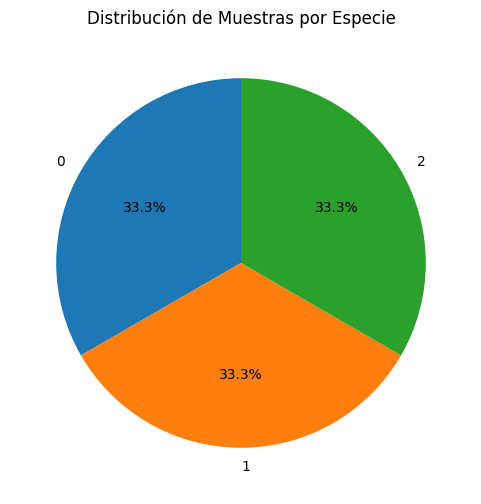

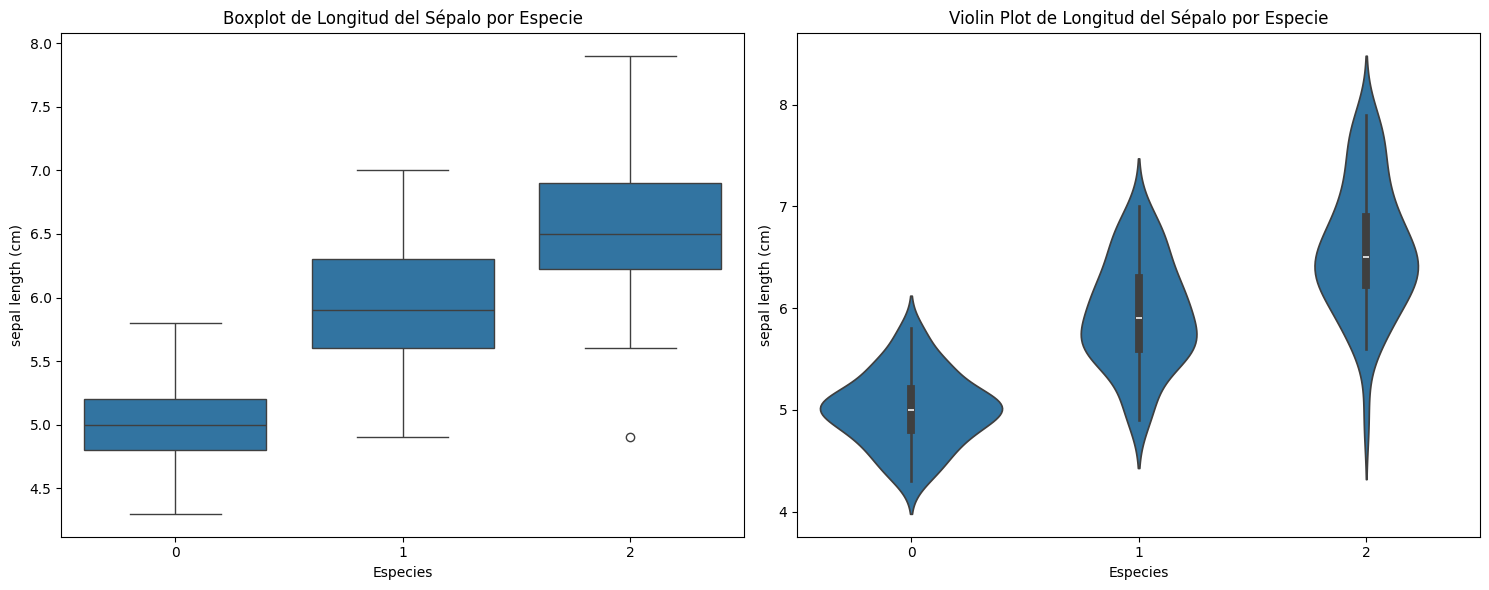

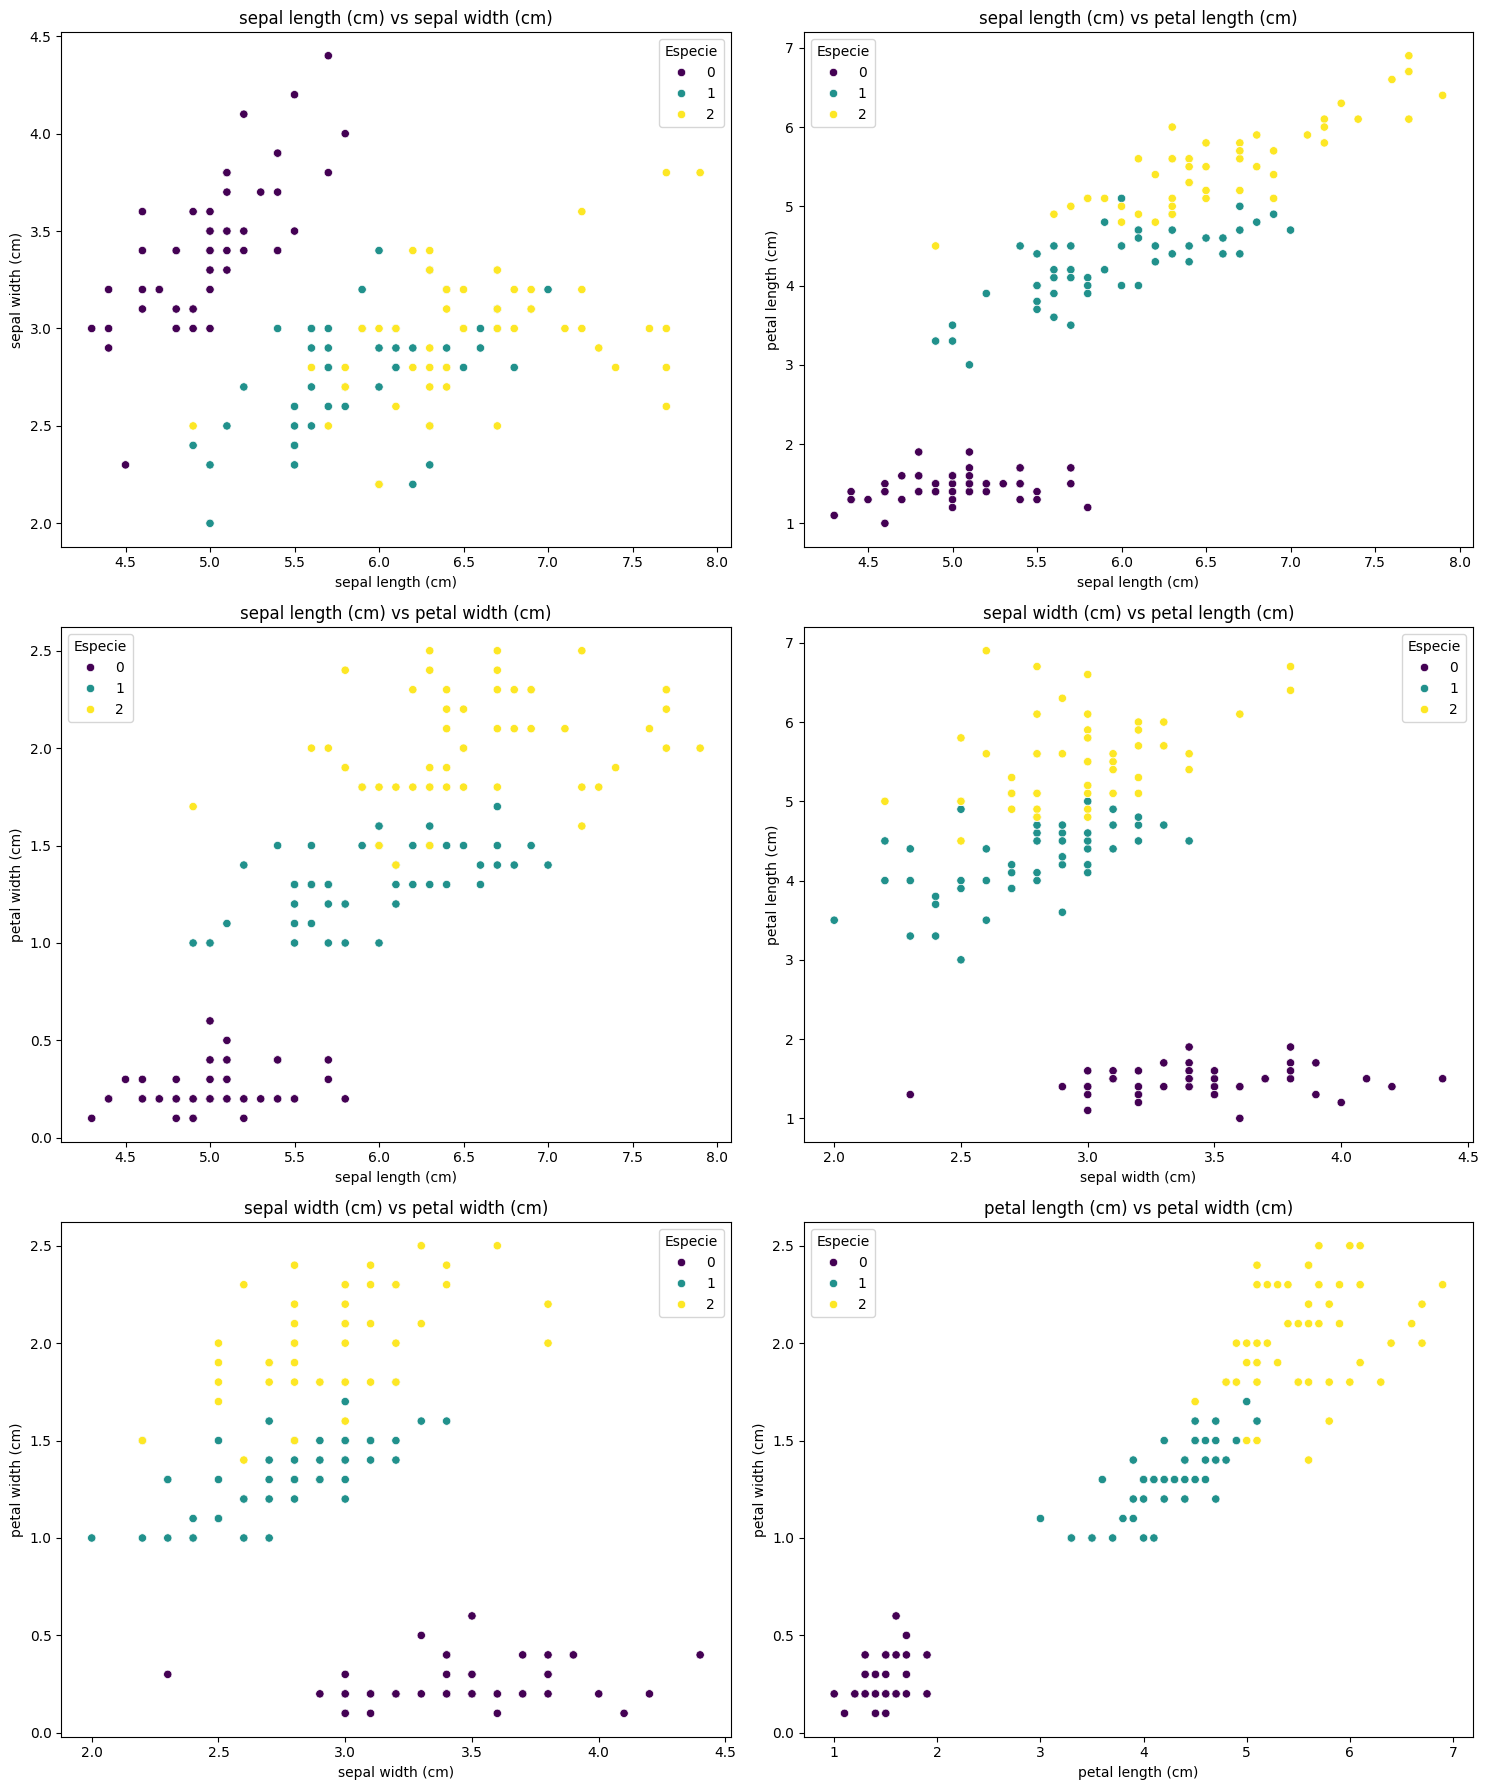

'"Basándome en las gráficas, se observa una clara relación entre las\n  características morfológicas de las flores (como el ancho del sépalo\n  y el ancho del pétalo) y las especies a las que pertenecen (etiquetadas\n  como 0, 1 y 2). La distribución de los puntos sugiere que el ancho del\n  pétalo (petal width) es una variable explicativa altamente discriminativa,\n  ya que las especies se separan de manera distintiva a lo largo de este eje:\n  la especie 0 tiene valores bajos (0.5-1.0), la especie 1 valores intermedios\n  (1.0-1.5) y la especie 2 valores altos (1.5-2.5). Por otro lado, el ancho del\n  sépalo (sepal width) muestra cierta superposición entre especies, especialmente entre las especi\n es 1 y 2, lo que indica que esta característica por sí sola podría ser menos útil\n para clasificar las flores. Estas insights son críticas para el feature engineering'

In [1]:
import pandas as pd
from sklearn.datasets import load_iris
iris=load_iris()
X=pd.DataFrame(data=iris.data, columns=iris.feature_names)
y=pd.Series(data=iris.target, name="Especies")
print("DataFrame de variables explicativas (X) creado:")
print(X.head())
print("\nSerie de la variable objetivo (y) creada:")
print(y.head())
#2 unir datos

df=pd.concat([X,y], axis=1)
print("DataFrame combinado (df) creado:")
print(df.head())

#3 confirmacion de datos
print("*Cuata muestra*")
print(df.iloc[3])

print("*Total de muestras*")
print(df['Especies'].value_counts())

# 3. Comprobar si hay valores faltantes
print("*\nValores faltantes por columna:*")
print(df.isnull().sum())

# 4. Mostrar estadísticas descriptivas
print("*\nResumen estadístico de las características:*")
print(df.describe())

#4 investigacion de conjuntos de iris
"""Este problema es teórico. El conjunto de datos del Iris es crucial en Machine
Learning por su simplicidad y claridad. Al explorar un conjunto de datos, es
fundamental comprender su contexto. Este conjunto contiene 150 muestras de tres
especies de lirios, con 50 muestras por cada especie. Los cuatro atributos
 (longitud_sepal, ancho_sepal, longitud_petal, ancho_petal) son mediciones
 físicas. La simplicidad de este conjunto lo hace perfecto para practicar la visualización y la clasificación."""

#5Extraiga los datos necesarios
 # Extracción de la columna 'sepal_width' de dos maneras
sepal_width_by_loc = df.loc[:, 'sepal width (cm)']
sepal_width_by_iloc = df.iloc[:, 1]
print("Extracción de 'sepal width' con .loc y .iloc exitosa.")

# Datos de las filas 50 a 99
data_50_to_99 = df.iloc[50:100]
print("\nDatos de las filas 50 a 99:")
print(data_50_to_99.head())

# Datos de 'petal_length' de las filas 50 a 99
petal_length_50_99 = df.iloc[50:100, 2]
print("\nValores de 'petal length' de las filas 50 a 99:")
print(petal_length_50_99.head())

# Datos donde 'petal_width' es 0.2
petal_width_0_2 = df.loc[df['petal width (cm)'] == 0.2]
print("\nDatos con 'petal width' de 0.2:")
print(petal_width_0_2.head())

#6 dibujo
import seaborn as sns
import matplotlib.pyplot as plt


# Gráfico circular del número de muestras por etiqueta
plt.figure(figsize=(6, 6))
df['Especies'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title("Distribución de Muestras por Especie")
plt.ylabel('')
plt.show()

# Gráfico de caja (boxplot) y de violín (violin plot)
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Boxplot
sns.boxplot(x='Especies', y='sepal length (cm)', data=df, ax=axes[0])
axes[0].set_title('Boxplot de Longitud del Sépalo por Especie')

# Violin plot
sns.violinplot(x='Especies', y='sepal length (cm)', data=df, ax=axes[1])
axes[1].set_title('Violin Plot de Longitud del Sépalo por Especie')

plt.tight_layout()
plt.show()

#7 Confirmación de la relación entre cantidades de características
# Nombres de las columnas
feature_names = df.columns[:-1]
n_features = len(feature_names)
combinations = []
for i in range(n_features):
    for j in range(i + 1, n_features):
        combinations.append((feature_names[i], feature_names[j]))

# Crear los gráficos de dispersión para todas las combinaciones
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 18))
axes = axes.flatten()

for i, (feat_x, feat_y) in enumerate(combinations):
    ax = axes[i]
    sns.scatterplot(x=feat_x, y=feat_y, hue='Especies', data=df, ax=ax, palette='viridis')
    ax.set_title(f"{feat_x} vs {feat_y}")
    ax.legend(title='Especie')

plt.tight_layout()
plt.show()

#8Explicación de gráficos visualizados y resultados de tablas
""""Basándome en las gráficas, se observa una clara relación entre las
  características morfológicas de las flores (como el ancho del sépalo
  y el ancho del pétalo) y las especies a las que pertenecen (etiquetadas
  como 0, 1 y 2). La distribución de los puntos sugiere que el ancho del
  pétalo (petal width) es una variable explicativa altamente discriminativa,
  ya que las especies se separan de manera distintiva a lo largo de este eje:
  la especie 0 tiene valores bajos (0.5-1.0), la especie 1 valores intermedios
  (1.0-1.5) y la especie 2 valores altos (1.5-2.5). Por otro lado, el ancho del
  sépalo (sepal width) muestra cierta superposición entre especies, especialmente entre las especi
 es 1 y 2, lo que indica que esta característica por sí sola podría ser menos útil
 para clasificar las flores. Estas insights son críticas para el feature engineering"""







